In [1]:
import numpy as np
x= np.random.normal(1,1,25)
x

array([ 0.42046806, -0.75497507, -0.08308502,  0.44076605,  1.49657683,
        1.84186699,  1.98297082,  0.45662215,  1.52452175,  0.60065727,
        0.83718065,  1.26249824,  0.74216684,  1.06088136,  1.94117215,
        0.33887789,  1.55930022,  1.64926398,  1.06731062,  1.16475369,
        2.18694838, -0.1989514 ,  0.21163646,  0.79251802,  0.16268193])

In [4]:
mean_est = np.mean(x)
var_est = np.var(x,ddof=1)
[mean_est, var_est]

[0.9081851546066944, 0.575366643200568]

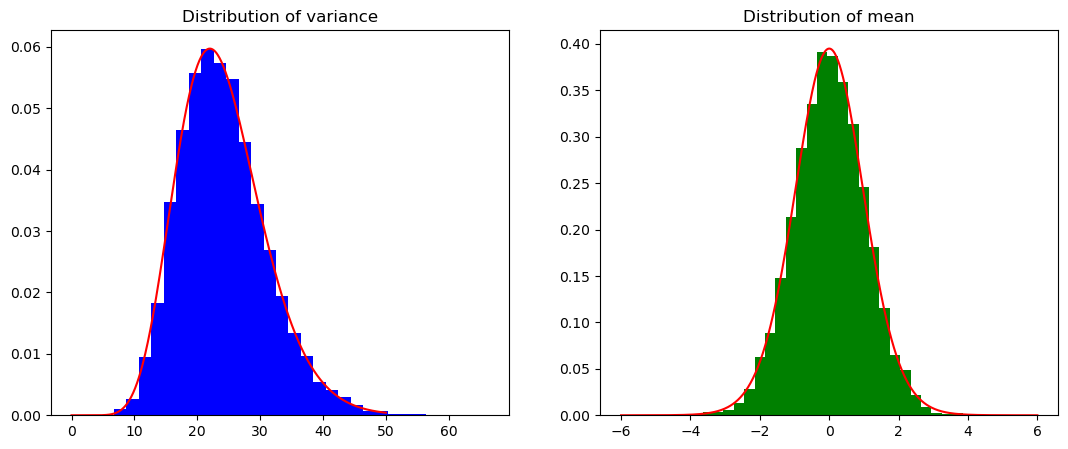

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
mean_est =[]
var_est= []
for i in range(10000):
    x= np.random.normal(1,1,25)
    mean_est.append(np.mean(x))
    var_est.append(np.var(x,ddof=1))
mean_est= np.array(mean_est)
var_est= np.array(var_est)

a= np.linspace(0,50,500)
b= np.linspace(-6,6,500)
dist_1 = (24*var_est)/1
dist_2 = (5*(mean_est- 1))/np.sqrt(var_est)

fig,axes= plt.subplots(1,2, figsize= (13,5))
axes[0].hist(dist_1, bins=30, density= True, color='blue')
axes[0].plot(a, stats.chi2.pdf(a,24), color='red')
axes[0].set_title('Distribution of variance')


axes[1].hist(dist_2, bins=30, density= True, color='green')
axes[1].plot(b, stats.t.pdf(b,24), color='red')
axes[1].set_title('Distribution of mean')
plt.show()




In [15]:
# confidence interval of mean when sigma is known
alpha= 0.05

x= np.random.normal(1,1,25)

ci= [np.mean(x)-(1.96*1)/np.sqrt(25), np.mean(x) + (1.96*1)/np.sqrt(25)]
ci


[0.8572017493015384, 1.6412017493015383]

In [34]:
# confidence interval of population mean when sigma is unknown

alpha= 0.05

x= np.random.normal(1,1,25)
t_val= stats.t.ppf(alpha/2, 24)   # since n is small and sigma unknown we use t distribution
sigma_square= np.var(x,ddof=1)
sigma= np.sqrt(sigma_square)

ci1= [np.mean(x)- (t_val*sigma/5), np.mean(x) + (t_val*sigma/5)]
ci1
true_mean =1
if ci1[1]<= true_mean<= ci1[0]:
    print('Ho is accepted')
else:
    print('Ho is rejected')

Ho is accepted


In [32]:
# confidence interval for population variance
alpha= 0.05
y = np.random.normal(1,1,25)

ci_2= [24*np.var(y,ddof=1)/stats.chi2.ppf(1-alpha/2, 24), 24*np.var(y,ddof=1)/stats.chi2.ppf(alpha/2, 24)]
ci_2
true_sigma =1
if ci_2[0] <= true_sigma<= ci_2[1]:
    print('Ho is accepted')
else:
    print('Ho is rejected')

Ho is accepted


In [36]:
# confidence interval for population mean from a uniform distribution with known variance
x= np.random.uniform(1,4,25)
true_mean= 2.5
sigma_2 = (4-1)**2/12
sigma= np.sqrt(sigma_2)

ci_3 = [np.mean(x)- (1.96*sigma/5), np.mean(x) + (1.96*sigma/5)]
ci_3

[2.1616795588036464, 2.840643475370646]

In [39]:
# confidence interval for population mean from a uniform distribution with unknown variance
x= np.random.uniform(1,4,25)
t_val= stats.t.ppf(alpha/2, 24) 
var_est= np.var(x,ddof=1)
sigma= np.sqrt(var_est)
ci_4= [np.mean(x) -(sigma*t_val/5), np.mean(x) + (sigma*t_val/5)]
ci_4

[2.60400934425151, 1.8225162049688248]